# AVL Tree

AVL trees in 5 minutes — Intro & Search (https://www.youtube.com/watch?v=DB1HFCEdLxA)

AVL trees in 9 minutes — Insertions (https://www.youtube.com/watch?v=JPI-DPizQYk)

AVL trees in 5 minutes — Deletions (https://www.youtube.com/watch?v=PBkXmhiCP1M)

https://www.diffchecker.com/Z4SXglC7/

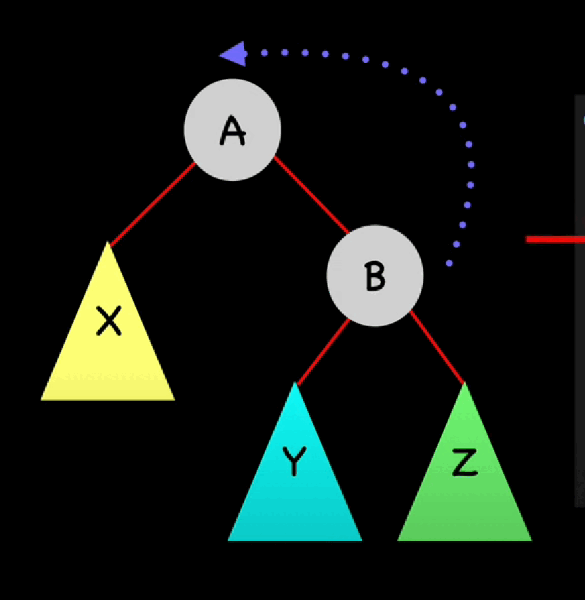

# Balancing Binary Search Trees (BST)

**Sequence 1: 20, 10, 30**
Already balanced, no rotations needed.
```txt

    20
   /  \
  10   30

```

**Sequence 2: 20, 30, 10**
Already balanced, no rotations needed.
```txt

    20
   /  \
  10   30

```

**Sequence 3: 30, 20, 10**
Unbalanced, needs a single right rotation.

Before rotation:
```txt

    30
   /
  20
 /
10

```

After right rotation:
```txt

    20
   /  \
  10   30

```

**Sequence 4: 10, 20, 30**
Unbalanced, needs a single left rotation.

Before rotation:
```txt

    10
      \
       20
         \
          30

```

After left rotation:
```txt

    20
   /  \
  10   30

```

**Sequence 5: 30, 10, 20**
Unbalanced, needs a double rotation (left-right rotation).

Before rotations:
```txt

    30
   /
  10
    \
     20

```

After first (left) rotation:
```txt

    30
   /
  20
 /
10

```

After second (right) rotation:
```txt

    20
   /  \
  10   30

```

**Sequence 6: 10, 30, 20**
Unbalanced, needs a double rotation (right-left rotation).

Before rotations:
```txt

    10
      \
       30
      /
     20

```

After first (right) rotation:
```txt

    10
      \
       20
         \
          30

```

After second (left) rotation:
```txt

    20
   /  \
  10   30
```

### Balancing Cases

**Left Heavy**: Balance factor (bf) > 1

1. **Left-Left Case**:
   - Left child has bf > 0.
   - Perform right rotation on current node.

   Before rotation:
   ```txt

       30
      /
     20
    /
   10

   ```

2. **Left-Right Case**:
   - Left child has bf < 0.
   - Perform left rotation on left child.
   - Perform right rotation on current node.

   Before rotation:
   ```txt

       30
      /
     10
       \
        20

   ```

**Right Heavy**: Balance factor (bf) < -1

1. **Right-Right Case**:
   - Right child has bf < 0.
   - Perform left rotation on current node.

   Before rotation:
   ```txt

       10
         \
          20
            \
             30

   ```

2. **Right-Left Case**:
   - Right child has bf > 0.
   - Perform right rotation on right child.
   - Perform left rotation on current node.

   Before rotation:
   ```txt

       10
         \
          30
         /
        20
        
   ```

### Rotations

- **Left Rotation**: Shifts node leftward.
- **Right Rotation**: Shifts node rightward.
- **Left-Right Rotation**: Left rotation on left child, then right rotation on current node.
- **Right-Left Rotation**: Right rotation on right child, then left rotation on current node.

What is AVL tree ? 4 Basic Rotations(Left, Right, Left-Right, Right-Left) for Balancing with Diagram [Simple Snippets]
(https://youtu.be/u3OVSkuOdqI?t=634)

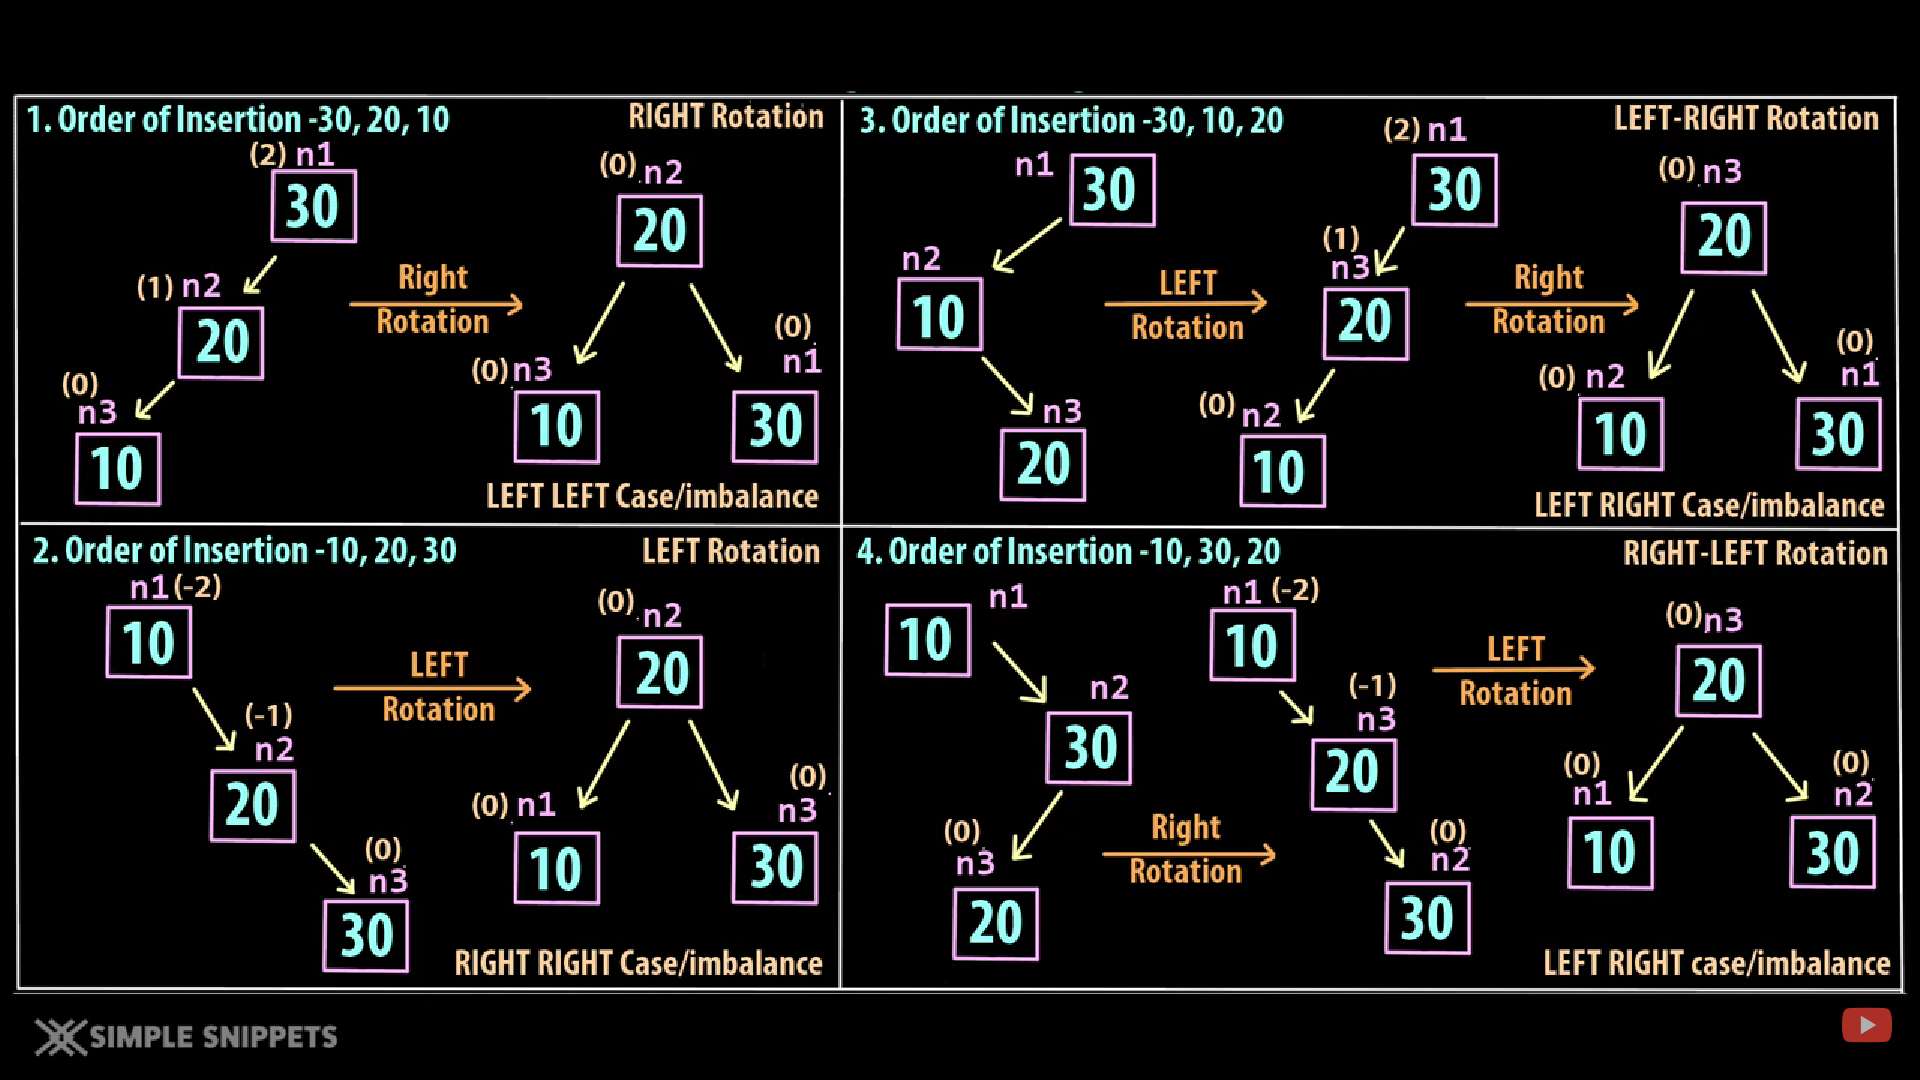

AVL tree Rotations - (LL RR LR RL) with more than 3 Nodes with [Simple Snippets] (https://youtu.be/_nyt5QYel3Q)

AVL Tree Insertion Example(2 Solved Problems) [Simple Snippets] (https://youtu.be/f0BplF93TIA)

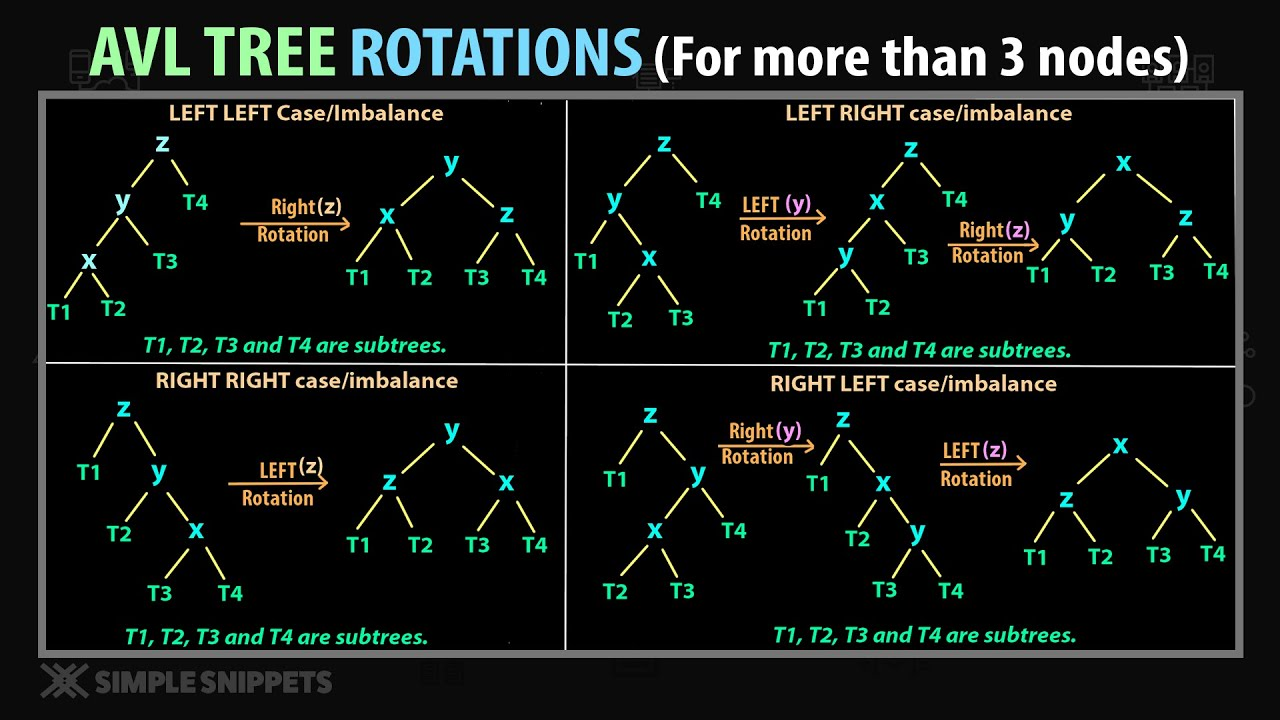

In [132]:
class AVL:
  def __init__(self, values=None):
    # initialize the avl with no root and optionally insert given values
    self.make_empty()
    if values:
      for value in values:
        self.insert(value)

  def is_empty(self):
    # check if the current node is empty (i.e., has no value)
    return self.value is None

  def is_leaf(self):
    # check if the current node is a leaf (i.e., has no children)
    return self.value is not None and self.left.is_empty() and self.right.is_empty()

  def make_empty(self):
    # make the current node empty
    self.value = None
    self.left = None
    self.right = None
    self.height = -1

  def inorder_traversal(self):
    # return the in-order traversal of the avl
    if self.is_empty():
      return []
    # recursively collect values from left subtree, root, and right subtree
    return self.left.inorder_traversal() + [self.value] + self.right.inorder_traversal()

  def insert(self, value):
    # insert a new value into the avl
    if self.is_empty():
      # if the current node is empty, create a new node
      self.value = value
      self.left = AVL()
      self.right = AVL()
      self.height = 0
    elif value < self.value:
      self.left.insert(value)
    elif value > self.value:
      self.right.insert(value)
    else:
      return  # duplicate value, do nothing

    # update the height of the current node
    self.height = 1 + max(self.left.get_height(), self.right.get_height())

    # balance the tree
    self.balance()

  def delete(self, value):
    # delete a value from the avl
    if self.is_empty():
      return
    if value < self.value:
      self.left.delete(value)
    elif value > self.value:
      self.right.delete(value)
    else:  # value == self.value
      if self.is_leaf():
        self.make_empty()
      elif self.left.is_empty():  # node has no left child
        self._replace_with_right_subtree()
      elif self.right.is_empty():  # node has no right child
        self._replace_with_left_subtree()
      else:  # node has two children
        # replace the current node with the maximum value from the left subtree
        left_max_value = self.left.get_max_value()
        self.value = left_max_value
        self.left.delete(left_max_value)

    if not self.is_empty():
      # update the height of the current node
      self.height = 1 + max(self.left.get_height(), self.right.get_height())

      # balance the tree
      self.balance()

  def get_height(self):
    # return the height of the current node
    return self.height if not self.is_empty() else -1

  def get_balance_factor(self):
    # return the balance factor of the current node
    return self.left.get_height() - self.right.get_height()

  def balance(self):
    # balance the avl
    bf = self.get_balance_factor()

    # left heavy
    if bf > 1:
      if self.left.get_balance_factor() < 0:  # left-right case
        self.left.rotate_left()
      self.rotate_right()  # left-left case

    # right heavy
    if bf < -1:
      if self.right.get_balance_factor() > 0:  # right-left case
        self.right.rotate_right()
      self.rotate_left()  # right-right case

  def rotate_left(self):
    # left rotation
    new_root = self.right
    self.right = new_root.left
    new_root.left = self

    self.update_height()
    new_root.update_height()

    # copy new_root's value and subtrees to self
    self.value, self.left, self.right, self.height = (
        new_root.value, new_root.left, new_root.right, new_root.height
    )

  def rotate_right(self):
    # right rotation
    new_root = self.left
    self.left = new_root.right
    new_root.right = self

    self.update_height()
    new_root.update_height()

    # copy new_root's value and subtrees to self
    self.value, self.left, self.right, self.height = (
        new_root.value, new_root.left, new_root.right, new_root.height
    )

  def update_height(self):
    # update the height of the current node
    if not self.is_empty():
      self.height = 1 + max(self.left.get_height(), self.right.get_height())

  def _replace_with_left_subtree(self):
    # replace the current node with its left child
    self.value, self.left, self.right, self.height = (
        self.left.value, self.left.left, self.left.right, self.left.height
    )

  def _replace_with_right_subtree(self):
    # replace the current node with its right child
    self.value, self.left, self.right, self.height = (
        self.right.value, self.right.left, self.right.right, self.right.height
    )

  def find(self, value):
    # check if a value is present in the avl
    if self.is_empty():
      return False
    if self.value == value:
      return True
    if value < self.value:
      return self.left.find(value)
    return self.right.find(value)

  def get_min_value(self):
    # return the minimum value in the avl
    if self.is_empty():
      return None
    if self.left.is_empty():
      return self.value
    return self.left.get_min_value()

  def get_max_value(self):
    # return the maximum value in the avl
    if self.is_empty():
      return None
    if self.right.is_empty():
      return self.value
    return self.right.get_max_value()

  def __str__(self):
    # return the in-order traversal as a string representation of the avl
    return str(self.inorder_traversal())


# test
avl = AVL([10, 5, 15, 3, 7, 12, 18])
print("Inorder Traversal:", avl.inorder_traversal())
print("Min:", avl.get_min_value())
print("Max:", avl.get_max_value())
print("Is 7 present?:", avl.find(7))
print("Is 20 present?:", avl.find(20))
avl.delete(10)
print("Inorder Traversal after deleting 10:", avl.inorder_traversal())

Inorder Traversal: [3, 5, 7, 10, 12, 15, 18]
Min: 3
Max: 18
Is 7 present?: True
Is 20 present?: False
Inorder Traversal after deleting 10: [3, 5, 7, 12, 15, 18]


# Huffman Algorithm

How Computers Compress Text: Huffman Coding and Huffman Trees [Tom Scott] (https://www.youtube.com/watch?v=JsTptu56GM8)

L-4.3: Huffman Coding Algorithm in Hindi with Example | Greedy Techniques(Algorithm) [Gate Smasher] (https://www.youtube.com/watch?v=uDS8AkTAcIU)


**Problem Statement:**

- Encode a string using Huffman coding.
- Minimize the total length of encoded string.
- Create a variable-length code for each character based on frequency.

**Solution Approach:**

1. **Build Frequency Dictionary:**
   - Count the frequency of each character in the string.

2. **Create Nodes:**
   - Create nodes for each character with its frequency.
   - Initialize a list of nodes.

3. **Build Huffman Tree:**
   - While more than one node remains:
     - Sort nodes by frequency.
     - Pop two nodes with the lowest frequency.
     - Merge them into a new node.
     - Add the new node back to the list.

4. **Generate Huffman Codes:**
   - Traverse the Huffman tree.
   - Assign binary codes: '0' for left, '1' for right.
   - Return a dictionary of characters to codes.

5. **Print Results:**
   - Output the Huffman codes sorted by code length.


In [133]:
class Node:
  def __init__(self, frequency, symbol=None, left=None, right=None):
    self.frequency = frequency
    self.symbol = symbol
    self.left = left
    self.right = right

  def __str__(self):
    return f'{self.symbol}'


def huffman_encoding(string):
  # create a frequency dictionary for the characters in the string
  frequency_dict = {}
  for char in string:
    if char in frequency_dict:
      frequency_dict[char] += 1
    else:
      frequency_dict[char] = 1

  # create a list of nodes from the frequency dictionary
  nodes = []
  for char, freq in frequency_dict.items():
    nodes.append((freq, Node(freq, char)))

  # build the huffman tree
  while len(nodes) > 1:
    nodes = sorted(nodes, key=lambda x: x[0])
    left_node = nodes.pop(0)[1]
    right_node = nodes.pop(0)[1]
    new_node = Node(left_node.frequency + right_node.frequency, left=left_node, right=right_node)
    nodes.append((new_node.frequency, new_node))

  # traverse the huffman tree to generate the huffman codes
  def generate_huffman_codes(node, code=""):
    if node is None:
      return {}
    if node.symbol is not None:
      return {node.symbol: code}

    left_codes = generate_huffman_codes(node.left, code + "0")
    right_codes = generate_huffman_codes(node.right, code + "1")

    # merge the dictionaries using the ** operator
    return {**left_codes, **right_codes}

  huffman_tree_root = nodes[0][1]
  huffman_codes = generate_huffman_codes(huffman_tree_root)

  return huffman_codes


string = 'hello vidhatri'
huffman_codes = huffman_encoding(string)
for char in sorted(huffman_codes, key=huffman_codes.get):
  print(char, huffman_codes[char])

t 000
r 001
h 010
l 011
i 100
e 1010
o 1011
  1100
v 1101
d 1110
a 1111


**Huffman Encoding Result for 'hello vidhatri':**

- **Original String:** `hello vidhatri`
- **Binary Encoding (ASCII):**
  - h: 01101000
  - e: 01100101
  - l: 01101100
  - l: 01101100
  - o: 01101111
  - ' ': 00100000
  - v: 01110110
  - i: 01101001
  - d: 01100100
  - h: 01101000
  - a: 01100001
  - t: 01110100
  - r: 01110010
  - i: 01101001

  Concatenated: `0110100001100101011011000110110001101111001000000111011001101001011001000110100001100001011101000111001001101001`

- **Binary Encoding (Huffman):**
  - h: 010
  - e: 1010
  - l: 011
  - l: 011
  - o: 1011
  - ' ': 1100
  - v: 1101
  - i: 100
  - d: 1110
  - h: 010
  - a: 1111
  - t: 000
  - r: 001
  - i: 100

  Concatenated: `010101001101011101110011001110110100111011000010111100001001100`

In [134]:
def encode_to_binary_blob(input_string, huffman_codes, filename):
  # convert the string to a sequence of huffman codes
  encoded_string = ''.join(huffman_codes[char] for char in input_string)

  # pad the encoded string to make its length a multiple of 8
  padding = 8 - len(encoded_string) % 8
  encoded_string = f'{padding:08b}' + encoded_string + '0' * padding

  # convert the binary string to bytes
  binary_blob = bytearray()
  for i in range(0, len(encoded_string), 8):
    byte = encoded_string[i:i+8]
    binary_blob.append(int(byte, 2))

  # write the binary blob to a file
  with open(filename, 'wb') as file:
    file.write(bytes(binary_blob))


encode_to_binary_blob(string, huffman_codes, 'encoded_string.bin')

In [135]:
def decode_from_binary_blob(filename, huffman_codes):
  # create a reverse mapping from code to character
  reverse_huffman_codes = {code: char for char, code in huffman_codes.items()}

  # read the binary blob from the file
  with open(filename, 'rb') as file:
    binary_blob = file.read()

  # convert the binary blob to a binary string
  binary_string = ''.join(f'{byte:08b}' for byte in binary_blob)

  # remove padding
  padding = int(binary_string[:8], 2)
  binary_string = binary_string[8:-padding] if padding else binary_string[8:]

  # decode the binary string using huffman codes
  decoded_string = []
  current_code = ''
  for bit in binary_string:
    current_code += bit
    if current_code in reverse_huffman_codes:
      decoded_string.append(reverse_huffman_codes[current_code])
      current_code = ''

  return ''.join(decoded_string)


decode_from_binary_blob('encoded_string.bin', huffman_codes)

'hello vidhatri'

In [136]:
import os


def ultimate_test(input_file, output_file):
  # step 1: read the string from the input file
  with open(input_file, 'r') as file:
    input_string = file.read().strip()  # read and strip any extra whitespace/newlines

  # print the size of the input file
  input_file_size = os.path.getsize(input_file)
  print(f"Size of input file: {input_file_size} bytes")

  # step 2: generate huffman codes using huffman_encoding
  huffman_codes = huffman_encoding(input_string)

  # print the huffman codes for reference
  print("Huffman Codes:")
  for char in sorted(huffman_codes, key=huffman_codes.get):
    print(f"{char}: {huffman_codes[char]}")

  # step 3: encode the string to a binary blob and write to the output file
  encode_to_binary_blob(input_string, huffman_codes, output_file)

  # print the size of the output file
  output_file_size = os.path.getsize(output_file)
  print(f"Size of output file: {output_file_size} bytes")

  # step 4: decode the binary blob from the output file
  decoded_string = decode_from_binary_blob(output_file, huffman_codes)

  # print the decoded string
  print("\nDecoded String:")
  print(decoded_string)


ultimate_test(input_file='input.txt', output_file='encoded_string.bin')

Size of input file: 4455 bytes
Huffman Codes:
l: 0000
y: 000100
O: 00010100000
j: 00010100001
x: 0001010001
B: 000101001
.: 00010101
f: 0001011
m: 000110
W: 000111
d: 0010
o: 0011
w: 0100
h: 0101

: 01100
S: 0110100000
Y: 0110100001
A: 011010001
N: 011010010
D: 011010011
k: 0110101
g: 011011
r: 01110
(: 011110
): 011111
,: 100000
v: 100001000
!: 10000100100
": 10000100101
U: 1000010011
J: 1000010100
H: 1000010101
R: 10000101100
G: 10000101101
M: 100001011100
F: 100001011101
q: 100001011110
K: 100001011111
b: 1000011
u: 100010
': 100011
i: 1001
t: 1010
a: 10110
-: 10111000
?: 101110010
L: 1011100110
C: 1011100111
c: 1011101
T: 1011110
I: 10111110
p: 10111111
e: 1100
s: 11010
n: 11011
 : 111
Size of output file: 2472 bytes

Decoded String:
Lyrics
(Alright man, fine)
("Wa-wa")
Uhh (doo-doo-doo-doo)
Wicki-wild wild (doo-doo-doo-doo-doo)
Wicki-wicki-wild
Wicki-wild
Wicki-wicki wild wild West
Jim West, desperado
Rough rider, no you don't want nada
None of this, six-gunnin' this, brother runn

# Greedy Algorithm [Week 7]

- Choose step by step for the best result.
- At each step, pick what seems best now. Do not revisit choices.
- Limits the search.

Examples:

- **Dijkstra's**: Finds the shortest path from a single source to all vertices.
- **Prim's**: Constructs a minimum spanning tree from a starting vertex.
- **Kruskal's**: Builds a minimum spanning tree by adding edges in increasing weight.
- **Interval scheduling**: Selects the maximum number of non-overlapping intervals.
- **Minimize lateness**: Schedules jobs to minimize the maximum lateness.
- **Huffman coding**: Creates an optimal prefix code for data compression.

# Divide and Conquer [Week 8]

- Break a problem into smaller subproblems.
- Solve each subproblem independently.
- Combine solutions to solve the original problem.

Examples:

- **Merge sort**: Sorts an array by dividing and merging.
- **Quick sort**: Sorts by partitioning around a pivot.
- **Binary search**: Finds an element in a sorted array.
- **Counting inversions**: Counts out-of-order pairs in an array.
- **Closest pair of points**: Finds the closest pair among a set of points.
- **Integer multiplication**: Multiplies large integers efficiently.
- **Quick select and Fast select**: Finds the k-th smallest element.
- **Median of Medians (MoM)**: Improves pivot choice in selection algorithms.
- **Fast select using MoM**: Selects an element quickly with better pivoting.

# Dynamic Programming [Week 9]

- Break problems into smaller parts.
- Solve each part once and store results.
- Use past solutions to build up to the answer.

Examples:

- **Fibonacci sequence**: Computes numbers in a sequence based on previous values.
- **Bellman-Ford algorithm**: Finds shortest paths in graphs with negative weights.
- **Floyd-Warshall algorithm**: Computes shortest paths between all pairs of vertices.
- **Knapsack problem**: Determines the most valuable combination of items within a weight limit.
- **Grid paths**: Calculates the number of ways to travel across a grid.
- **Longest Common Sub Word (LCW)**: Finds the longest common substring in two strings.
- **Longest Common Sub Sequence (LCS)**: Finds the longest subsequence common to both strings.
- **Edit distance**: Measures the minimum number of edits to transform one string into another.
- **Matrix multiplication**: Multiplies matrices efficiently using dynamic programming.

# Interval Scheduling Problem

**Problem Statement:**

- You have a set of jobs.
- Each job has a start time and a finish time.
- Jobs may overlap.
- Objective: Select the maximum number of non-overlapping jobs.

**Solution Approach:**

1. **Sort Jobs:**
   - Sort the jobs by their finish times.

2. **Select Jobs:**
   - Initialize an empty list for selected jobs.
   - Track the finish time of the last selected job.
   - Iterate through sorted jobs:
     - If the start time of the current job is greater than or equal to the finish time of the last selected job:
       - Select this job.
       - Update the finish time.

3. **Return Selected Jobs:**
   - Output the list of selected jobs.


In [137]:
def interval_scheduling(jobs):
  # sort by finish times
  jobs_sorted = sorted(jobs, key=lambda x: x[2])

  # list of selected jobs
  selected_jobs = []

  # track end time of last job
  last_finish_time = -1

  for job in jobs_sorted:
    job_name, start_time, finish_time = job

    # select job if it starts after last finish time
    if start_time >= last_finish_time:
      selected_jobs.append(job)
      last_finish_time = finish_time

  return selected_jobs


# test
jobs = [
    ('A', 1, 2),
    ('B', 3, 4),
    ('C', 0, 6),
    ('D', 1, 4),
    ('E', 4, 5),
    ('F', 5, 9),
    ('G', 9, 11),
    ('H', 8, 10)
]

selected_jobs = interval_scheduling(jobs)
print("Selected jobs:", selected_jobs)

Selected jobs: [('A', 1, 2), ('B', 3, 4), ('E', 4, 5), ('F', 5, 9), ('G', 9, 11)]


**Sorted Jobs by Finish Time and Selection Process:**

1. **A (1, 2):** Select
2. **B (3, 4):** Select
3. **E (4, 5):** Select
4. **D (1, 4):** Overlaps
5. **C (0, 6):** Overlaps
6. **F (5, 9):** Select
7. **H (8, 10):** Overlaps
8. **G (9, 11):** Select

**Final List of Jobs:**

- A (1, 2)
- B (3, 4)
- E (4, 5)
- F (5, 9)
- G (9, 11)

# Minimize Lateness Problem

**Problem Statement:**

- You have a set of jobs.
- Each job has a duration and a deadline.
- Jobs must be scheduled to minimize total lateness.
- Lateness = Finish Time - Deadline (if positive).

**Solution Approach:**

1. **Sort Jobs:**
   - Sort the jobs by their deadlines in ascending order.

2. **Schedule Jobs:**
   - Initialize `current_time` to 0.
   - Iterate through sorted jobs:
     - Calculate start time and finish time for each job.
     - Update `current_time` to the finish time of the current job.
     - Track total lateness and maximum lateness.

3. **Return Schedule:**
   - Output a dictionary of job names with their start and finish times.
   - Also return total lateness and job with maximum lateness.

In [138]:
def minimize_lateness(jobs):
  # sort jobs by their deadlines in ascending order
  jobs_sorted = sorted(jobs, key=lambda x: x[2])

  current_time = 0
  schedule = {}
  total_lateness = 0
  max_lateness = 0
  max_lateness_job = None

  for job in jobs_sorted:
    job_name, duration, deadline = job
    start_time = current_time
    finish_time = start_time + duration
    lateness = finish_time - deadline

    # update total lateness and max lateness
    total_lateness += max(lateness, 0)
    if lateness > max_lateness:
      max_lateness = lateness
      max_lateness_job = job_name

    schedule[job_name] = (start_time, finish_time)
    current_time = finish_time

  return schedule, total_lateness, max_lateness, max_lateness_job


# test
jobs = [
    ('A', 3, 6),
    ('B', 2, 9),
    ('C', 1, 8),
    ('D', 4, 9),
    ('E', 3, 14),
    ('F', 2, 15)
]

schedule, total_lateness, max_lateness, max_lateness_job = minimize_lateness(jobs)

for job, (start, finish) in schedule.items():
  print(f"Job {job}: Start Time = {start}, Finish Time = {finish}")

print(f"Total Lateness: {total_lateness}")
print(f"Maximum Lateness: {max_lateness} (Job {max_lateness_job})")

Job A: Start Time = 0, Finish Time = 3
Job C: Start Time = 3, Finish Time = 4
Job B: Start Time = 4, Finish Time = 6
Job D: Start Time = 6, Finish Time = 10
Job E: Start Time = 10, Finish Time = 13
Job F: Start Time = 13, Finish Time = 15
Total Lateness: 1
Maximum Lateness: 1 (Job D)


**Sorted Jobs by Deadline and Scheduling Process:**

1. **A (3, 6):** Start at 0, Finish at 3
2. **C (1, 8):** Start at 3, Finish at 4
3. **B (2, 9):** Start at 4, Finish at 6
4. **D (4, 9):** Start at 6, Finish at 10
5. **E (3, 14):** Start at 10, Finish at 13
6. **F (2, 15):** Start at 13, Finish at 15

**Final Schedule:**

- A (Start: 0, Finish: 3)
- C (Start: 3, Finish: 4)
- B (Start: 4, Finish: 6)
- D (Start: 6, Finish: 10)
- E (Start: 10, Finish: 13)
- F (Start: 13, Finish: 15)

**Total Lateness and Maximum Lateness:**

- **Total Lateness:** 1
- **Maximum Lateness:** 1 (Job D)